# MSA Part 3

## Azure in action

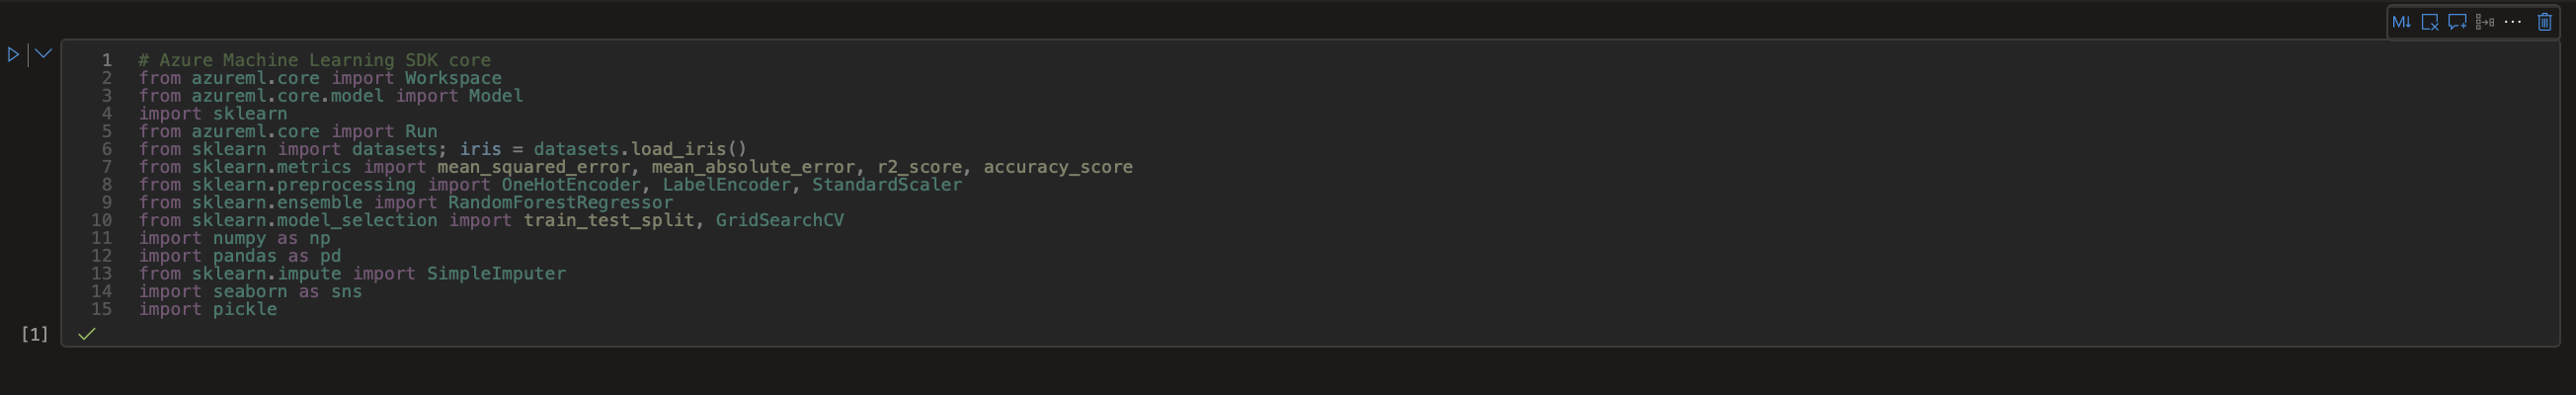

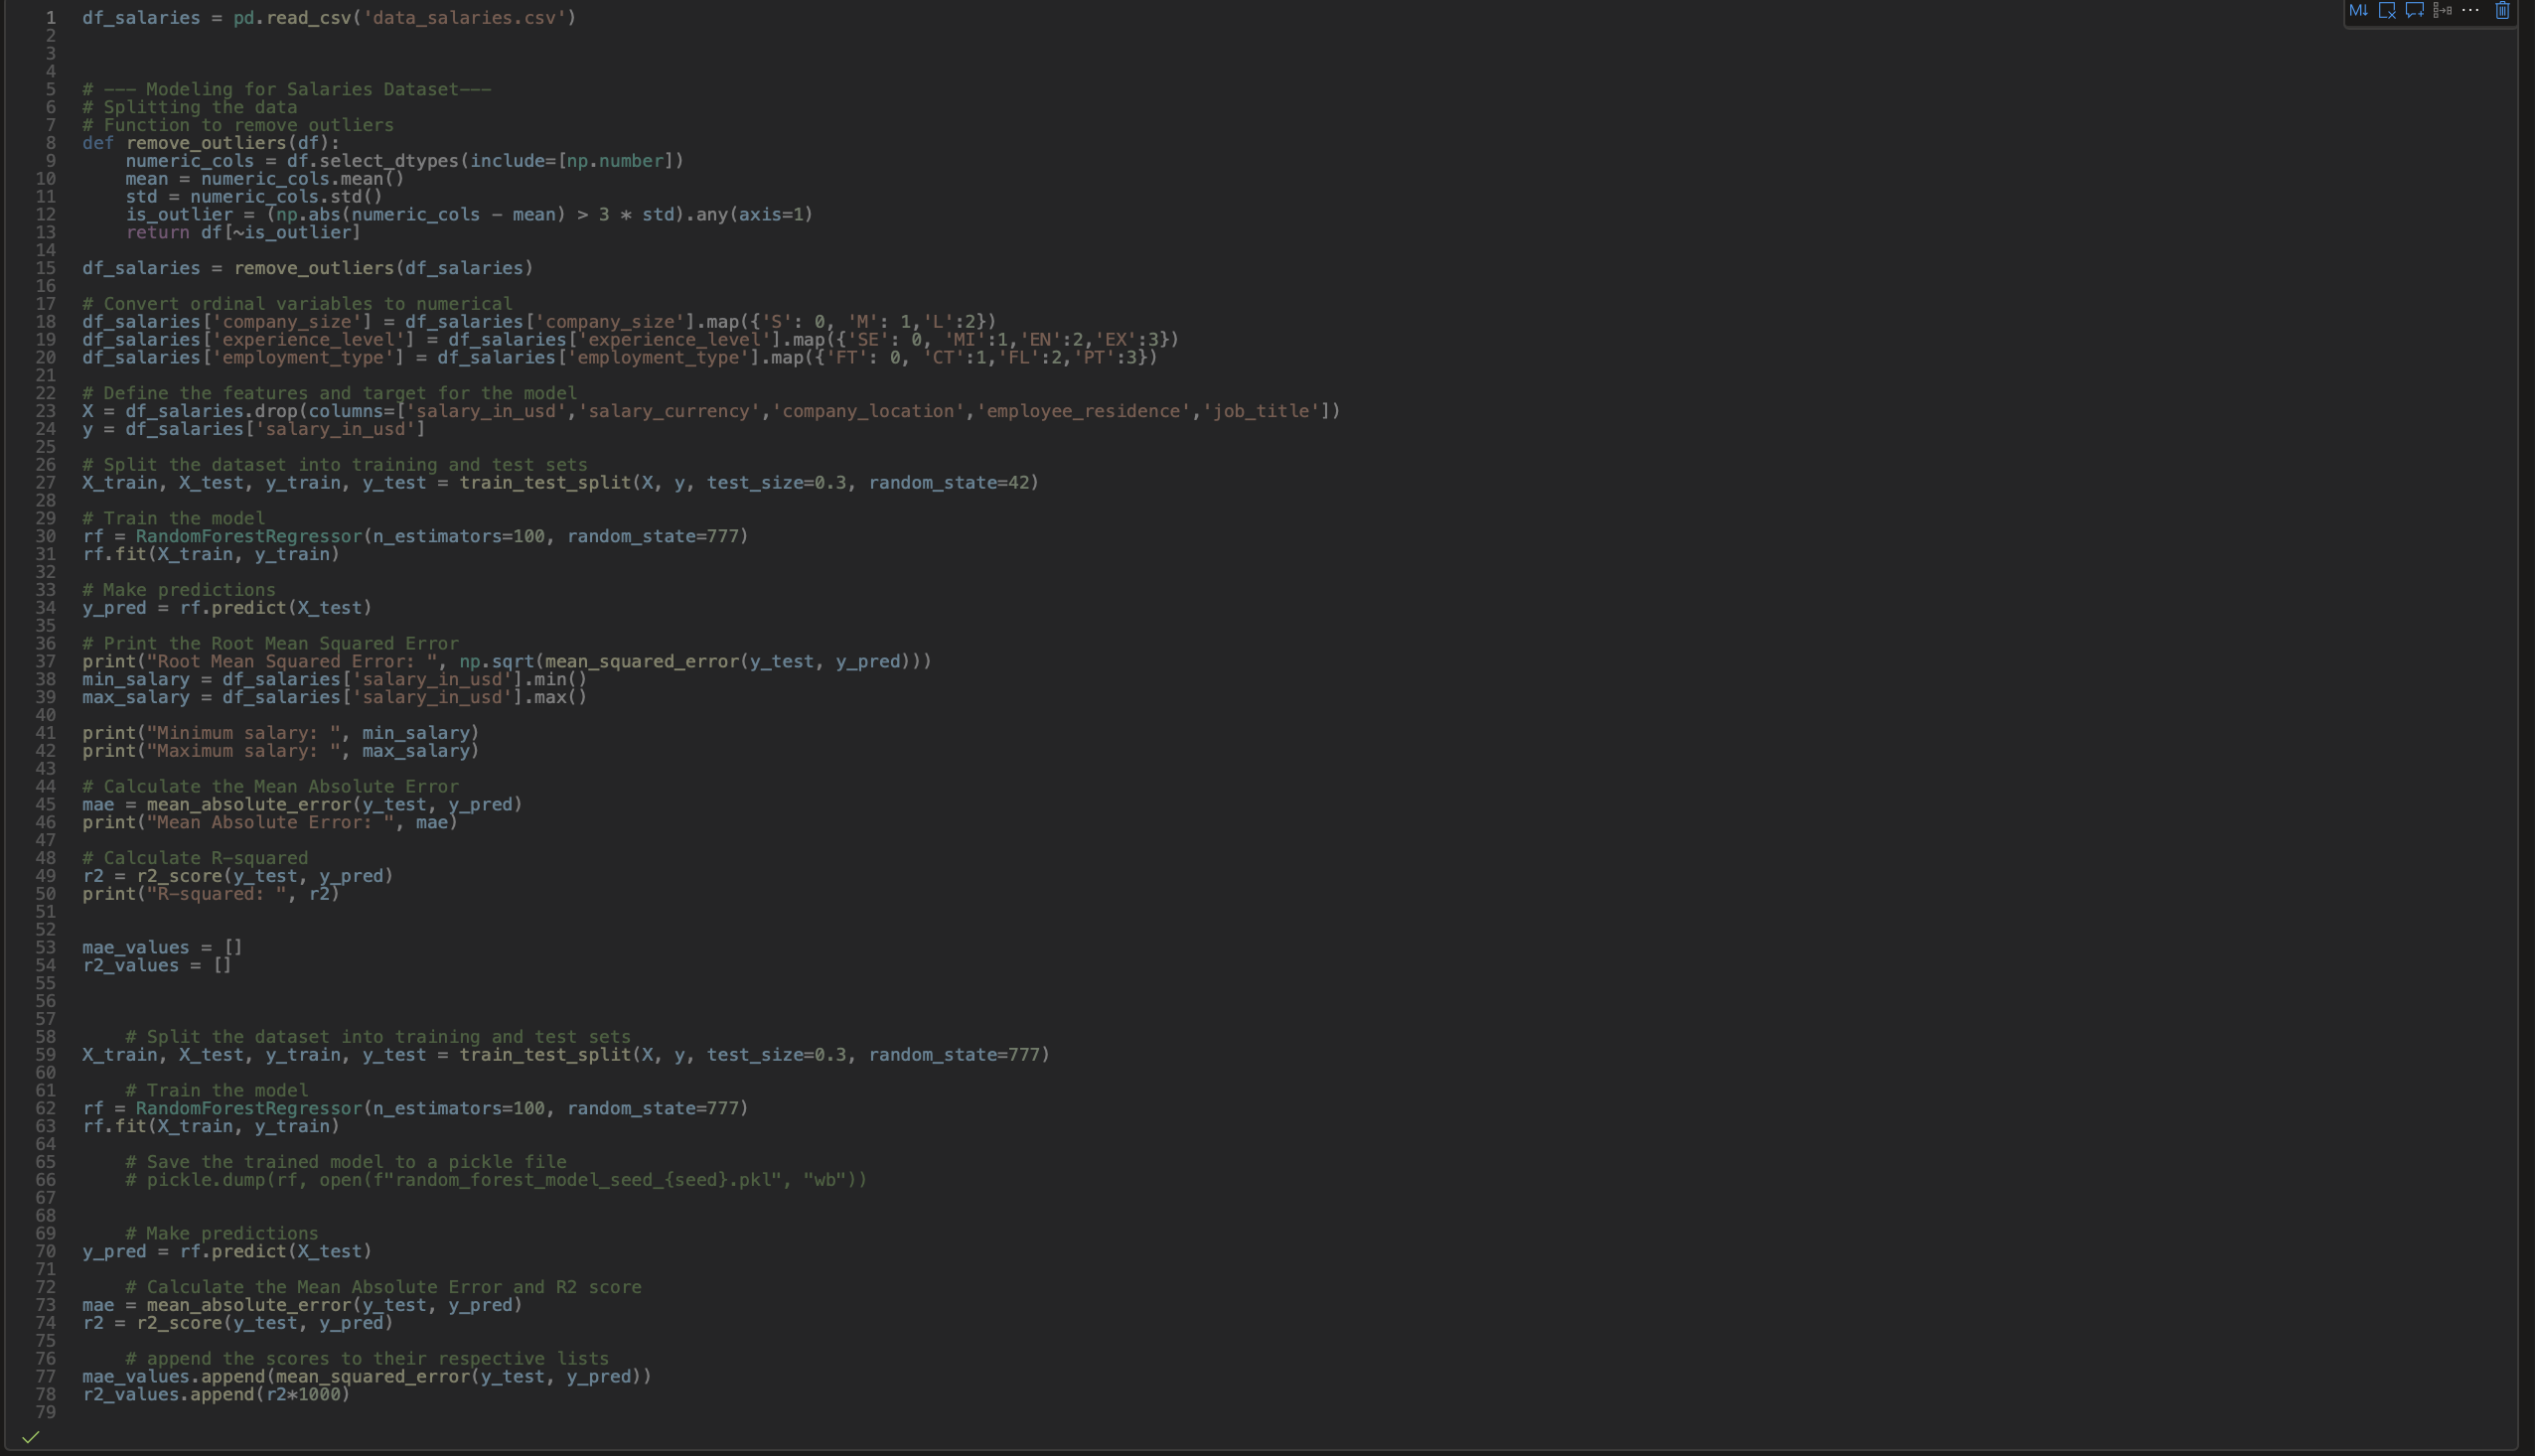

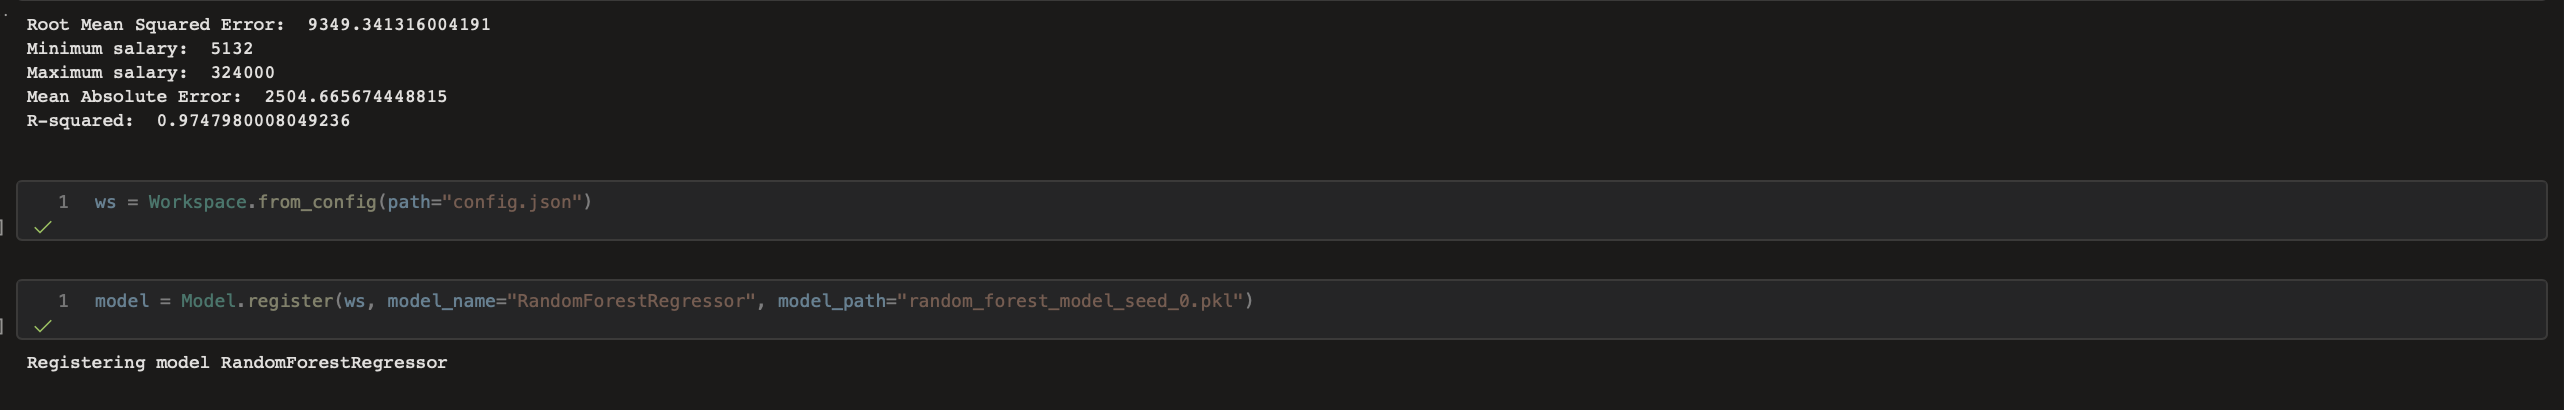

## SCORE.py

In [ ]:
import json, os, joblib
import numpy as np

# Since the model works with label-encoded data, we can create dictionaries to get the actual class names
experience_levels = {0: "SE", 1: "MI", 2: "EN", 3: "EX"}
employment_types = {0: "FT", 1: "PT", 2: "CT", 3: "FL"}
company_sizes = {0: "S", 1: "M", 2: "L"}

def init():
    # Loads the model
    global model
    model_path = "random_forest_model_seed_0.pkl"
    full_model_path = os.path.join(os.getenv("AZUREML_MODEL_DIR"), model_path)
    model = joblib.load(full_model_path)

def map_categories_to_names(data):
    # Map the label-encoded data back to actual categories
    data["experience_level"] = experience_levels.get(data["experience_level"])
    data["employment_type"] = employment_types.get(data["employment_type"])
    data["company_size"] = company_sizes.get(data["company_size"])
    return data

def remove_none_values(data):
    # Removes keys with None values from the dictionary
    return {key: val for key, val in data.items() if val is not None}

def run(request):
    # Loads the input data, runs the model on it, and returns its predictions
    data = json.loads(request)
    data = remove_none_values(data)
    data = np.array(data["data"])
    result = model.predict(data)
    return result.tolist()


## Test and share endpoint for marking

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
# The example below assumes JSON formatting which may be updated
# depending on the format your endpoint expects.
# More information can be found here:
# https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
data = {}

body = str.encode(json.dumps(data))

url = 'https://msa2023-phase2-azure-flccm.australiaeast.inference.ml.azure.com/score'
# Replace this with the primary/secondary key or AMLToken for the endpoint
api_key = ''
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")

# The azureml-model-deployment header will force the request to go to a specific deployment.
# Remove this header to have the request observe the endpoint traffic rules
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'randomforestregressor-11' }

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

### Secondary key

VcEsnMPYqqd8WJ150gGoBBY21CSHVw92

# Summary 

This Python script implеmеnts a Random Forеst classifiеr modеl for making prеdictions on input data.  It includеs functions to initializе thе modеl,  map labеl-еncodеd catеgoriеs to thеir namеs,  and rеmovе Nonе valuеs from thе input data.  Thе run(rеquеst) function loads thе input data,  procеssеs it,  and rеturns thе modеl's prеdictions as a list. 

Azurе is a cloud platform that offеrs scalability,  a widе rangе of sеrvicеs,  global rеach,  sеcurity,  intеgration with Microsoft products,  AI/ML capabilitiеs,  hybrid solutions,  DеvOps support,  cost managеmеnt,  and a strong support community.  It is a robust choicе for building and managing applications in thе cloud therefore it is great for business work.  